In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams26.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,0,MLP
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,0,MLP
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,0,MLP
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,0,MLP
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,0,MLP


In [3]:
len(df)

18463

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18463 non-null  int64  
 1   N_Person           18463 non-null  int64  
 2   Xcenter            18463 non-null  float64
 3   Ycenter            18463 non-null  float64
 4   PerXmin            18463 non-null  float64
 5   PerYmin            18463 non-null  float64
 6   PerXmax            18463 non-null  float64
 7   PerYmax            18463 non-null  float64
 8   N_Handgun          18463 non-null  int64  
 9   HgXcenter          18463 non-null  float64
 10  HgYcenter          18463 non-null  float64
 11  HgXmin             18463 non-null  float64
 12  HgYmin             18463 non-null  float64
 13  HgXmax             18463 non-null  float64
 14  HgYmax             18463 non-null  float64
 15  Intersection       18463 non-null  object 
 16  Included_Center    184

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14219
Ycenter              14200
PerXmin              14227
PerYmin              14224
PerXmax              14227
PerYmax              14204
N_Handgun                5
HgXcenter             7301
HgYcenter             7299
HgXmin                7303
HgYmin                7303
HgXmax                7303
HgYmax                7302
Intersection             9
Included_Center          2
Intersection_Area     8434
Hg_Area               7303
Distance             18463
Ground_Truth             3
GT                       3
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

0    17459
2      973
1       31
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,MLP,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,MLP,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,MLP,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,MLP,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,MLP,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18463 non-null  int64  
 1   N_Person                      18463 non-null  int64  
 2   Xcenter                       18463 non-null  float64
 3   Ycenter                       18463 non-null  float64
 4   PerXmin                       18463 non-null  float64
 5   PerYmin                       18463 non-null  float64
 6   PerXmax                       18463 non-null  float64
 7   PerYmax                       18463 non-null  float64
 8   N_Handgun                     18463 non-null  int64  
 9   HgXcenter                     18463 non-null  float64
 10  HgYcenter                     18463 non-null  float64
 11  HgXmin                        18463 non-null  float64
 12  HgYmin                        18463 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{0: 'MLP', 2: 'SVM', 1: 'RFC'}


In [10]:
print(df2['Ground_Truth'].value_counts())

0    17459
2      973
1       31
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18463 non-null  int64  
 1   N_Person                      18463 non-null  int64  
 2   Xcenter                       18463 non-null  float64
 3   Ycenter                       18463 non-null  float64
 4   PerXmin                       18463 non-null  float64
 5   PerYmin                       18463 non-null  float64
 6   PerXmax                       18463 non-null  float64
 7   PerYmax                       18463 non-null  float64
 8   N_Handgun                     18463 non-null  int64  
 9   HgXcenter                     18463 non-null  float64
 10  HgYcenter                     18463 non-null  float64
 11  HgXmin                        18463 non-null  float64
 12  HgYmin                        18463 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14770, 28) (14770,)
(3693, 28) (3693,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9441435341909278
mean_test =  0.9441435341909277


,fit_time,score_time,test_score,train_score
0,0.061838,0.002991,0.944482,0.944106
1,0.059850,0.001987,0.944482,0.944106
2,0.058849,0.002989,0.944482,0.944106
3,0.059846,0.001991,0.944482,0.944106
4,0.059847,0.002988,0.944482,0.944106
5,0.059839,0.002990,0.943805,0.944181
6,0.060844,0.001991,0.943805,0.944181
7,0.058850,0.002987,0.943805,0.944181
8,0.059850,0.001988,0.943805,0.944181
9,0.057875,0.002964,0.943805,0.944181


In [15]:
# save the model to disk
filename = 'rfc_model_intersection_0.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9658165952004815
mean_test =  0.9647935003385241


,fit_time,score_time,test_score,train_score
0,0.097739,0.002995,0.970210,0.965170
1,0.097741,0.002963,0.963439,0.965696
2,0.097738,0.002993,0.964116,0.965546
3,0.098765,0.002990,0.965471,0.966749
4,0.097737,0.002999,0.958700,0.962537
5,0.098736,0.002992,0.970887,0.969232
6,0.100731,0.002993,0.960054,0.967426
7,0.107712,0.002992,0.962762,0.965847
8,0.099731,0.002992,0.968179,0.965094
9,0.100732,0.002992,0.964116,0.964869


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[  67,  112],
        [   4, 3510]],

       [[3687,    1],
        [   1,    4]],

       [[3516,    3],
        [ 111,   63]]], dtype=int64)

                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
11                        HgXmin    0.003338  0.005352
8                      N_Handgun    0.003472  0.010415
1                       N_Person    0.004288  0.012858
9                      HgXcenter    0.006298  0.009970
16             Intersection_Area    0.016823  0.033928
19      Intersection_Center_left    0.018285  0.050102
13                        HgXmax    0.019260  0.039204
24  Intersection_No_intersection    0.021021  0.044525
6                        PerXmax    0.024543  0.041492
23           Intersection_Inside    0.030066  0.078147
15               Included_Center    0.030620  0.044871
2                        Xcenter    0.031472  0.050509
18        

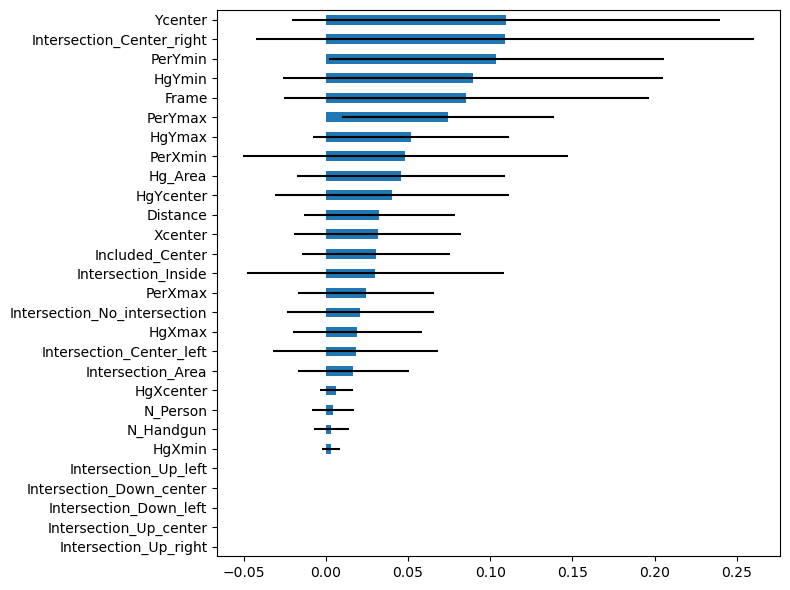

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3514
           1       0.80      0.80      0.80         5
           2       0.95      0.36      0.53       174

    accuracy                           0.97      3693
   macro avg       0.91      0.72      0.77      3693
weighted avg       0.97      0.97      0.96      3693



In [19]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18463 non-null  int64  
 1   N_Person                      18463 non-null  int64  
 2   Xcenter                       18463 non-null  float64
 3   Ycenter                       18463 non-null  float64
 4   PerXmin                       18463 non-null  float64
 5   PerYmin                       18463 non-null  float64
 6   PerXmax                       18463 non-null  float64
 7   PerYmax                       18463 non-null  float64
 8   N_Handgun                     18463 non-null  int64  
 9   HgXcenter                     18463 non-null  float64
 10  HgYcenter                     18463 non-null  float64
 11  HgXmin                        18463 non-null  float64
 12  HgYmin                        18463 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86655931, -1.0070482 ,  0.38579739, -1.05768312,  0.40690805,
        -0.80175599,  0.3490977 , -1.42444496, -0.49743562,  0.64906485,
        -1.25764863,  0.70161332, -1.17665053,  0.59510104, -1.333981  ,
         1.17572215, -0.04959714, -0.63161158, -0.6978181 ,  2.66684058,
        -0.28064447, -0.01645859, -0.01040848, -0.53930332, -1.08654657,
        -0.11997839, -0.06169113, -0.13778823],
       [-1.86438852, -1.0070482 ,  0.38551189, -1.05709323,  0.40592667,
        -0.80006758,  0.34954299, -1.42718941, -0.49743562,  0.6474696 ,
        -1.2585021 ,  0.69861164, -1.17730133,  0.59490005, -1.33503905,
         1.17572215, -0.04717499, -0.62569888, -0.69639026,  2.66684058,
        -0.28064447, -0.01645859, -0.01040848, -0.53930332, -1.08654657,
        -0.11997839, -0.06169113, -0.13778823],
       [-1.86221774, -1.0070482 ,  0.38613191, -1.05924539,  0.40739451,
        -0.80412046,  0.34926217, -1.42318409, -0.49743562,  0.64729099,
        -1.25991514,  0.6985

In [21]:
print(scaler.mean_)

[8.59853112e+02 8.80246980e-01 3.93099740e+02 3.82412786e+02
 3.05841375e+02 2.46141187e+02 4.80358105e+02 5.18684385e+02
 2.99030493e-01 3.10622080e+02 3.12410656e+02 2.87259574e+02
 2.92872541e+02 3.33984585e+02 3.31948771e+02 4.19758436e-01
 9.27397412e+02 2.02297112e+03 2.32075899e+02 1.23273574e-01
 7.30108866e-02 2.70811894e-04 1.08324758e-04 2.25315496e-01
 5.41407139e-01 1.41905432e-02 3.79136652e-03 1.86318583e-02]


In [22]:
print(scaler.scale_)

[4.60662088e+02 8.74086243e-01 2.12286845e+02 6.88579007e+01
 2.20039580e+02 1.11927398e+02 2.12729975e+02 3.92582504e+01
 6.01144112e-01 1.52927569e+02 9.72948205e+01 1.52227439e+02
 9.92282433e+01 1.54116716e+02 9.59297255e+01 4.93519292e-01
 1.66284209e+03 1.80722287e+03 1.37507191e+02 3.28750970e-01
 2.60154372e-01 1.64541349e-02 1.04073543e-02 4.17789927e-01
 4.98282499e-01 1.18275829e-01 6.14572376e-02 1.35220975e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13847, 28)

In [25]:
y_train.value_counts()

0    13094
2      730
1       23
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4616, 28)

In [27]:
y_test.value_counts()

0    4365
2     243
1       8
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[9.99999965e-01, 9.04284815e-09, 2.55731210e-08],
       [9.89565438e-01, 9.64296686e-08, 1.04344652e-02],
       [9.36199212e-01, 6.67364933e-10, 6.38007870e-02],
       ...,
       [9.98606540e-01, 8.33357254e-10, 1.39345875e-03],
       [9.99997879e-01, 2.54827073e-21, 2.12084436e-06],
       [1.00000000e+00, 7.60138465e-11, 1.06675641e-11]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 234,   17],
        [  11, 4354]],

       [[4606,    2],
        [   2,    6]],

       [[4364,    9],
        [  15,  228]]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4365
           1       0.75      0.75      0.75         8
           2       0.96      0.94      0.95       243

    accuracy                           0.99      4616
   macro avg       0.90      0.90      0.90      4616
weighted avg       0.99      0.99      0.99      4616



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9963168917455044
Score test =  0.9939341421143848


In [34]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

KeyboardInterrupt: 

In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))